pneumonia detection using transfer learning in a easier way 


In [57]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

assigning path to data

In [58]:
#resize the images
#provide path for test and train data

IMAGE_SIZE =[224,224]
train_path = '../input/chest-xray-pneumonia/chest_xray/train'
test_path = '../input/chest-xray-pneumonia/chest_xray/test'

selecting relevant model

In [59]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [60]:
# its important that we don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [81]:
  # useful for getting number of output classes
folders = glob('../input/chest-xray-pneumonia/chest_xray/train/*')

In [82]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [83]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [84]:
# for viewing the structure of the model

model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

optimization


In [85]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

importing images from dataset

In [86]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [87]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [88]:
test_set = test_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [89]:
len(training_set)


163

In [70]:
len(test_set)

20

training the data

In [90]:
#fit the model
#change the parameters according to your needs to get a better accuracy


r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch= len(training_set),
  validation_steps= len(test_set)
)

Epoch 1/5
163/163 [==============================] - 130s 797ms/step - loss: 0.2111 - accuracy: 0.9189 - val_loss: 0.4708 - val_accuracy: 0.8606
Epoch 2/5
163/163 [==============================] - 109s 670ms/step - loss: 0.1044 - accuracy: 0.9595 - val_loss: 0.2969 - val_accuracy: 0.9071
Epoch 3/5
163/163 [==============================] - 109s 669ms/step - loss: 0.1018 - accuracy: 0.9624 - val_loss: 0.5184 - val_accuracy: 0.8750
Epoch 4/5
163/163 [==============================] - 109s 667ms/step - loss: 0.1016 - accuracy: 0.9582 - val_loss: 0.4552 - val_accuracy: 0.8958
Epoch 5/5
163/163 [==============================] - 115s 703ms/step - loss: 0.0766 - accuracy: 0.9722 - val_loss: 0.2974 - val_accuracy: 0.9215


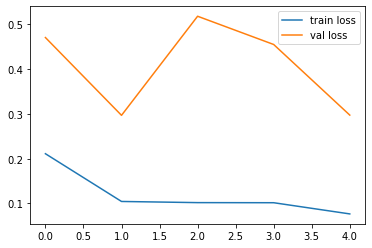

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [91]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

saving the model

In [92]:

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [93]:



model = load_model('model_vgg16.h5')

prediction 

In [94]:

#selecting an image from validation dataset for prediction

img = image.load_img('../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg',target_size=[224,224])

In [95]:
x = image.img_to_array(img)

In [96]:
x = np.expand_dims(x,axis=0)

In [97]:
img_data= preprocess_input(x)

In [98]:
classes = model.predict(img_data)

In [99]:
# 0 refers not effected by pneumonia
# 1 refers effected with pneumonia

print(classes)

[[0. 1.]]
